### Lista videogiochi, inclusi nel servizio in abbonamento di Microsoft: "Gamepass", in relazione alla critica e utenza del sito web Metacritic*.
- **Titolo:** Nome del videogioco;
- **Metascore:** Valutazione del titolo da parte della critica;
- **Metascore_Reviews:** Numero di recensioni critica;
- **User_Score:** Valutazione del titolo da parte degli utenti della piattaforma;
- **Developer:** Nome del team di sviluppo;
- **Genres:** Generi di videogioco;
- **Released_on:** Data di rilascio.

/* 
- *I titoli presi in considerazione in quest'analisi, fanno riferimento alla libreria dell'abbonamento Gamepass, senza contare i titoli che presto lasceranno il catalogo, e quelli aggiunti nel mese di gennaio. Aggiornamento al 31/01/2025.*
- *I dati presi in considerazione fanno fede solo a quelli con una valutazione presente nel campo "Metascore". Quelli sprovvisti, saranno comunque conteggiati, ma non verrano presi in considerazioni in eventuali operazioni sui dati in se.*

#### L'obiettivo dell'analisi è di di individuare, attraverso i dati estratti, tipologia di titoli da inserire in futuro nel catalogo, analizzando le valutazioni, generi, sviluppatori ed eventualmente anche date di rilascio di quelli presenti nella lista.

In [12]:

import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./gamepass_pulito.csv",encoding="ISO-8859-1", sep=';')
df["Released_on"] = pd.to_datetime(df["Released_on"],format="%d/%m/%Y")

In [4]:

# creo copia dataframe per poter lavorare sui valori NON nulli e non utilizi per analisi specifiche.
df_no_nulli = df.copy()
df_no_nulli = pd.DataFrame(df_no_nulli)
df_no_nulli = df_no_nulli.dropna(subset="Metascore")
df_no_nulli = df_no_nulli.reset_index()
df_no_nulli = df_no_nulli.drop(columns="index")
df_no_nulli["Metascore"] = df_no_nulli["Metascore"].astype(int)
df_no_nulli["Metascore_Reviews"] = df_no_nulli["Metascore_Reviews"].astype(int)
df_no_nulli["User_Score"] = df_no_nulli["User_Score"].astype(int)

## ---------------------------------------------------------------------------------------------------

## Analisi sul genere dei videogiochi.

### I singoli generi più presenti all'interno del catalogo

Il numero totale dei diversi generi, presenti all'interno del catalogo, sono: 76 



,Metascore
Genres,
FPS,48
Action Adventure,41
Open-World Action,41
Western RPG,26
Action RPG,26


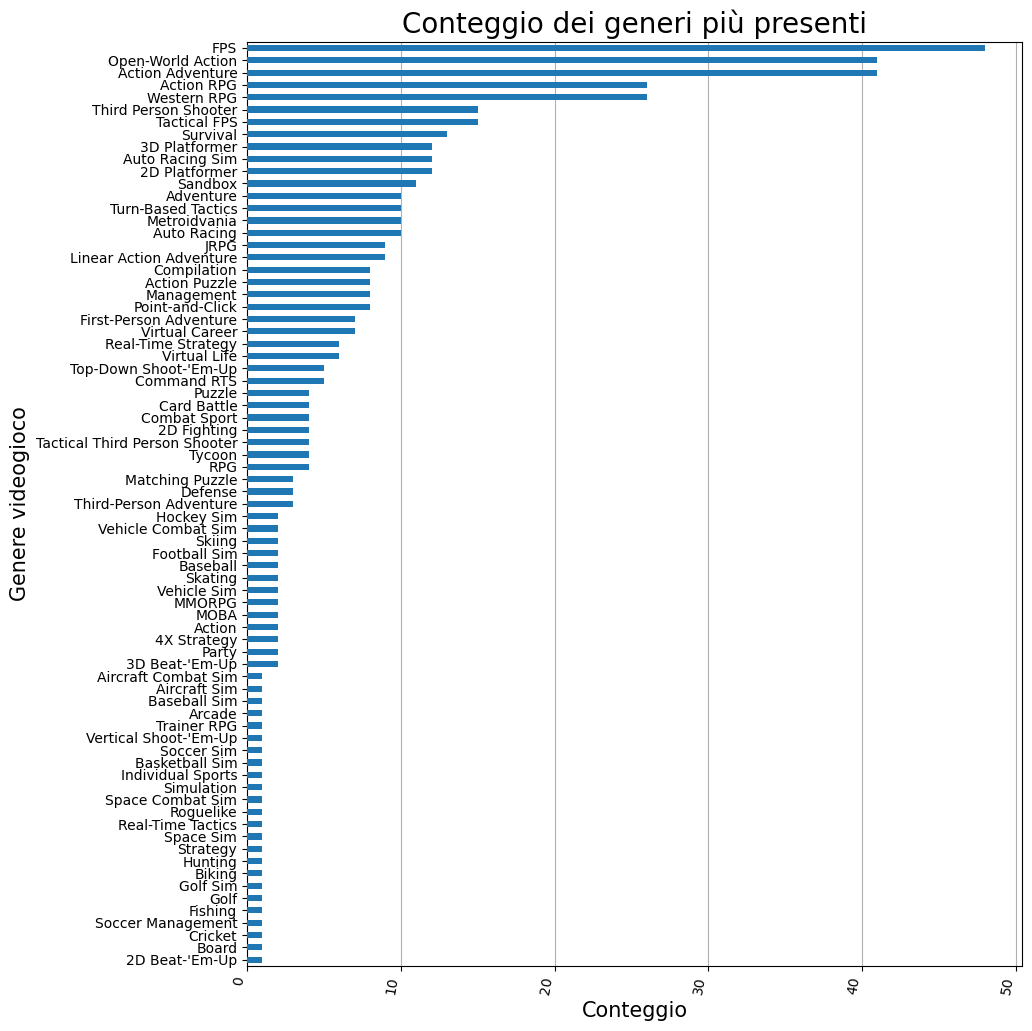

In [5]:

df_no_nulli.groupby("Genres")["Metascore"].count().sort_values().plot(kind = "barh", figsize=(10, 12), zorder=3)
plt.xticks(rotation=80, ha="right")
plt.title("Conteggio dei generi più presenti", size=20)
plt.ylabel("Genere videogioco", size=15)
plt.xlabel("Conteggio",size=15)
plt.grid(True, axis="x", zorder=0)

print("Il numero totale dei diversi generi, presenti all'interno del catalogo, sono:",df["Genres"].nunique(),"\n")
pd.DataFrame(df.groupby("Genres")["Metascore"].count().sort_values(ascending=False).head(5))

#### Generi con il miglior metascore, in media, e generi più presenti:

In [8]:

ordinato_metascore = df_no_nulli.groupby("Genres").agg(Metascore=("Metascore", "mean"),Conteggio=("Metascore", "size")).sort_values(by="Metascore", ascending=False).head(5)
ordinato_conteggio = round(df_no_nulli.groupby("Genres").agg(Metascore=("Metascore", "mean"),Conteggio=("Metascore", "size")).sort_values(by="Conteggio", ascending=False).head(5),2)

ordinato_conteggio['Percentuale_Presenza'] = (ordinato_conteggio['Conteggio'] / df.shape[0]) * 100
ordinato_conteggio['Percentuale_Presenza'] = ordinato_conteggio['Percentuale_Presenza'].apply(lambda x: f"{x:.2f}%")


display(ordinato_metascore)
display(ordinato_conteggio)

,Metascore,Conteggio
Genres,,
Aircraft Combat Sim,88.00,1
Card Battle,85.25,4
2D Beat-'Em-Up,85.00,1
Strategy,84.00,1
Soccer Management,84.00,1


,Metascore,Conteggio,Percentuale_Presenza
Genres,,,
FPS,81.17,48,9.18%
Action Adventure,77.83,41,7.84%
Open-World Action,76.07,41,7.84%
Western RPG,82.54,26,4.97%
Action RPG,78.62,26,4.97%


#### Generi con il peggior metascore, in media, e presenza nel catalogo:

In [85]:

ordinato_metascore = round(df_no_nulli.groupby("Genres").agg(Metascore=("Metascore", "mean"),Conteggio=("Metascore", "size")).sort_values(by="Metascore").head(5),2)

ordinato_metascore['Percentuale_Presenza'] = (ordinato_metascore['Conteggio'] / df.shape[0]) * 100
ordinato_metascore['Percentuale_Presenza'] = ordinato_metascore['Percentuale_Presenza'].apply(lambda x: f"{x:.2f}%")


display(ordinato_metascore)

,Metascore,Conteggio,Percentuale_Presenza
Genres,,,
Cricket,57.0,1,0.19%
Fishing,63.0,1,0.19%
Hunting,64.0,1,0.19%
Football Sim,67.0,2,0.38%
Golf,68.0,1,0.19%


#### Si può dedurre che: 

 - Il genere più presente è quello degli FPS (9.18%) e il suo punteggio secondo la critica è di 81;
 - Ci sono due sottogeneri del genere "Action", ovvero "Adventure" e "Open-World", che sono tra i primi cinque più presenti, avendo una buona valutazione (78 e 76) e apparendo per il 15.68%;
 - Ci sono altri due sottogeneri di "RPG", ovvero "Western" e "Action", che sono tra i primi cinque più presenti, avendo un'ottima valutazione (83 e 79), e appaiono per il 9.94%;
 - I punteggi con il maggior Metascore, appaiono pochissime volte ma sono ben valutati. Bisognerebbe valutare se si può inserire qualche altro titolo per questi generi, sia per puntare sulla varietà offerta dall'abbonamento, sia perchè gli stessi sono ben valutati ma poco sfruttati, potrebbero portare quel livello in più di qualità dell'abbonamento.
 - I titoli con meno valutazione sono quelli relativi a gli sport. 

## ---------------------------------------------------------------------------------------------------

## Analisi su Developer:

#### Analisi sul rapporto Valutazione/Developer

In [52]:

print("\nIl numero totale dei diversi Developer, presenti all'interno del catalogo, sono:",df["Developer"].nunique(),"\n")
print("-----------------------------------------------------")

print("\nMedia Metascore in base ai Developer:\n")
print("-----------------------------------------------------")

display(pd.DataFrame(round(df_no_nulli.groupby("Developer").agg(Metascore=("Metascore","mean"),Conteggio=("Developer","size")).sort_values(by="Metascore",ascending=False).head(5))))

print("-----------------------------------------------------")

print("\nMedia Metascore in base al conteggio dei Developer:\n")
print("-----------------------------------------------------")
display(pd.DataFrame(round(df_no_nulli.groupby("Developer").agg(Metascore=("Metascore","mean"),Conteggio=("Developer","size")).sort_values(by="Conteggio",ascending=False).head(5))))


Il numero totale dei diversi Developer, presenti all'interno del catalogo, sono: 320 

-----------------------------------------------------

Media Metascore in base ai Developer:

-----------------------------------------------------


,Metascore,Conteggio
Developer,,
Raster,93.0,1
Bungie,92.0,2
Playground Games,92.0,1
Maddy Makes Games,92.0,1
PLAYDEAD,92.0,2


-----------------------------------------------------

Media Metascore in base al conteggio dei Developer:

-----------------------------------------------------


,Metascore,Conteggio
Developer,,
Double Fine Productions,80.0,13
PopCap,81.0,11
BioWare,84.0,10
Rare Ltd.,83.0,10
Ryu ga Gotoku Studios,82.0,9


#### Numero di titoli presenti nel catalogo, in base al team di sviluppo (primi 15)

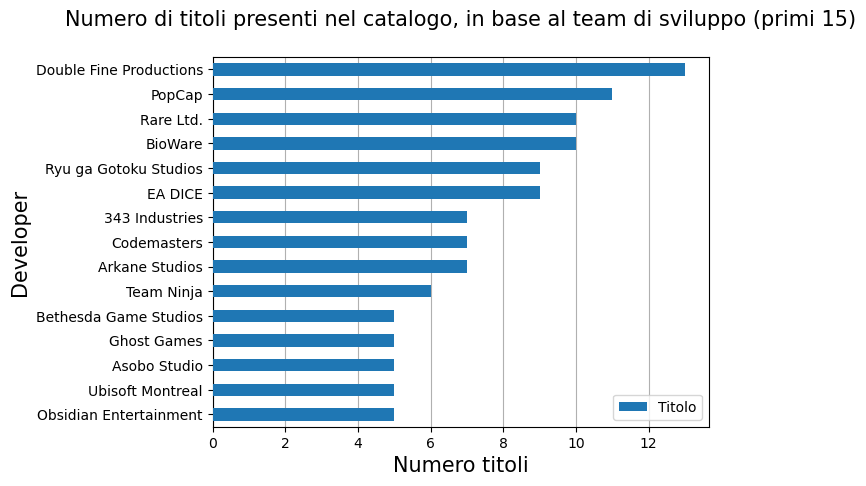

In [9]:

team_titoli = pd.DataFrame(df.groupby("Developer")["Titolo"].count().sort_values(ascending=False).head(15))
team_titoli.plot(kind="barh", zorder=3)
plt.title("Numero di titoli presenti nel catalogo, in base al team di sviluppo (primi 15)\n", size=15)
plt.ylabel("Developer", size=15)
plt.xlabel("Numero titoli",size=15)
plt.grid(True, axis="x", zorder=0)
plt.gca().invert_yaxis()

#### Videogiochi per developer (estratti quelli con Metascore in media, più alto tra i vari titoli pubblicati dallo stesso sviluppatore)

In [118]:

display(df[df["Developer"] == "Double Fine Productions"].sort_values(by="Released_on", ascending=False).head(1))
display(df[df["Developer"] == "PopCap"].sort_values(by="Released_on", ascending=False).head(1))
display(df[df["Developer"] == "Rare Ltd."].sort_values(by="Released_on", ascending=False).head(1))
display(df[df["Developer"] == "BioWare"].sort_values(by="Released_on", ascending=False).head(2))
display(df[df["Developer"] == "Ryu ga Gotoku Studios"].sort_values(by="Released_on", ascending=False).head(1))

,Titolo,Metascore,Metascore_Reviews,User_Score,Developer,Genres,Released_on,Year
373,Psychonauts 2,87.0,72.0,81.0,Double Fine Productions,3D Platformer,2021-08-25,2021.0


,Titolo,Metascore,Metascore_Reviews,User_Score,Developer,Genres,Released_on,Year
364,Plants vs. Zombies: Battle for Neighborville,77.0,25.0,57.0,PopCap,Tactical Third Person Shooter,2019-09-04,2019.0


,Titolo,Metascore,Metascore_Reviews,User_Score,Developer,Genres,Released_on,Year
403,Sea of Thieves,69.0,78.0,56.0,Rare Ltd.,Open-World Action,2018-03-20,2018.0


,Titolo,Metascore,Metascore_Reviews,User_Score,Developer,Genres,Released_on,Year
284,Mass Effect Legendary Ed.,87.0,47.0,75.0,BioWare,Compilation,2021-05-14,2021.0
10,Anthem,59.0,89.0,40.0,BioWare,Action RPG,2019-02-15,2019.0


,Titolo,Metascore,Metascore_Reviews,User_Score,Developer,Genres,Released_on,Year
517,Yakuza: Like a Dragon,84.0,56.0,82.0,Ryu ga Gotoku Studios,JRPG,2020-11-10,2020.0


#### Considerazioni: 

 - Per quanto riguarda il numero di titoli, che hanno la valutazione migliore in relazione a gli sviluppatori, è un numero esiguo. Infatti si tratta di un solo titolo per i 3/5 degli sviluppatori, e due per quanto riguarda "Bungie" e "PLAYDEAD", ma tutti gli sviluppatori hanno ottenuto in media uno score superiore al 90.
 - Per quanto riguarda il numero di titoli che più sono presenti in relazione a gli sviluppatori, spicca "Double Fine Productions" con ben 13 titoli, anche se lo score medio dei suoi giochi si aggira sul punteggio di 80. Fanno meglio i team di sviluppo "Rare Ltd." e "Bioware", con rispettivamente 10 titoli e valutazione 83 di media, e 10 titoli con valutazione 84 di media.
 - Possiamo notare che, per quanto riguarda i team di sviluppo: "Rare Ltd." e "PopCap", l'ultimo gioco pubblicato da ognuno di loro, non ha ottenuto una buona valutazione. Invece per quanto riguarda "Ryu ga Gotoku Studios" e soprattutto "Double Fine Productions", l'ultimo titolo è andato molto bene. Caso diverso per "BioWare", in quanto l'ultimo gioco è andato bene, ma sembrerebbe essere una riedizione di altri titoli, mentre l'ultimo titolo, ovvero "Anthem", risulta essere andato molto male.

## ---------------------------------------------------------------------------------------------------

## Analisi sulla data

### Distribuzione nel tempo, dei vari titoli, per data di uscita

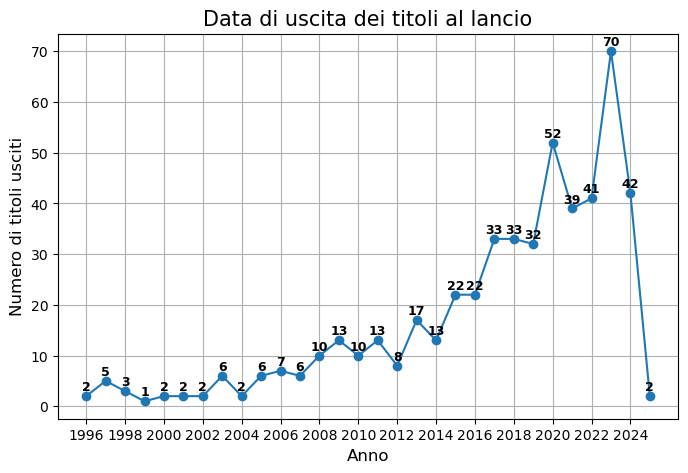

In [35]:

df["Year"] = df["Released_on"].dt.year
titoli_per_anno = df.groupby("Year")["Titolo"].count()

titoli_per_anno.plot(kind="line", x="Titolo",y="Year", figsize=(8, 5), marker='o', markersize=6)

plt.title("Data di uscita dei titoli al lancio", size=15)
plt.xlabel("Anno", size=12)
plt.ylabel("Numero di titoli usciti", size=12)

plt.xticks(ticks=[int(year) for year in range(int(titoli_per_anno.index.min()), int(titoli_per_anno.index.max()) + 1, 2)])

plt.grid()

for x, y in zip(titoli_per_anno.index, titoli_per_anno):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0,4), ha='center', fontsize=9, fontweight='bold')

plt.show()

#### Considerazioni: 

 - Possiamo notare che nella libreria, i numeri dei titoli che sono stati rilasciati tra il 1996 al 2014, vanno da 1 titolo (esempio 1999) a 13 (nel 2014), poi abbiamo un continuo crescendo del numero, infatti abbiamo dal 2015 al 2016, 22 titoli per entrambi, altro picco che va dal 2017 al 2019 di circa 33 titoli. Nel 2020 ci sono stati ben 52 titoli, 2021 e 2022 sono stati più calanti, mentre il picco massimo è stato nel 2023, con ben 70 titoli rilasciati!, per poi perdere di quota nel 2024 (42 titoli).
 - I titoli pubblicati nell'anno scorso sono stati ben 42, quindi una media di 3,5 titoli al mese!
 - I titoli pubblicati prima del 2000 sono stati solo 11, mostrando come possibilmente preferite inserire, nel catalogo, titoli quanto più recenti (dato che dal 2017 fino al 2024, i valori sono più alti dei precedenti periodi).
 - Sembrebbe dunque una scelta precisa quella di inserire nel catalogo, tanti titoli appena usciti, sacrificando invece i titoli più datati, probabilmente per far leva su un pubblico più giovane.

## ---------------------------------------------------------------------------------------------------

## Analisi sui migliori e peggiori videogiochi, in base alle valutazioni

### Analisi sui migliori e peggiori videogiochi, in riferimento al dato "Metascore".

#### Analisi per capire i primi titoli che hanno un valore più alto e più basso ("Metascore"), in relazione alle recensioni ricevute ("Metascore_reviews").

#### Possiamo pensare che i videogiochi con un alto valore da parte della critica (valutazione Metacritic), non hanno necessariamente tante recensioni (Metascore_reviews). Ciò porterebbe ad avere un dato non preciso riguardante la reale valutazione di un videogioco, in quanto è necessario avere tante recensioni, per un valore quanto più fedele alla realtà dei fatti.

##### Assegnamo un punteggio per ogni titolo, che tiene conto della valutazione e del numero di recensioni (colonna "Punteggio_Ponderato").

In [56]:


valutazioni = df_no_nulli.copy()
valutazioni["Punteggio_Ponderato"] = round((valutazioni['Metascore'] * valutazioni['Metascore_Reviews']) / (valutazioni['Metascore_Reviews'] + 1), 2)

print("\nI cinque migliori titoli:\n")
print("-" * 66)

print("\nMetascore")
display(df_no_nulli.sort_values(by="Metascore",ascending=False)[["Titolo","Metascore","Metascore_Reviews","Developer","Genres","Released_on"]].head(5).reset_index(drop=True).set_index(pd.Index(range(1, 6))))
print("\nPunteggio Ponderato")
display(valutazioni.sort_values(by="Punteggio_Ponderato",ascending=False)[["Titolo","Punteggio_Ponderato","Metascore_Reviews","Developer","Genres","Released_on"]].head(5).reset_index(drop=True).set_index(pd.Index(range(1, 6))))
print("-" * 66)
print("\n\nI cinque peggiori titoli:\n\n")
print("-" * 66)

print("\nMetascore")
display(df_no_nulli.sort_values(by="Metascore")[["Titolo","Metascore","Metascore_Reviews","Developer","Genres","Released_on"]].head(5).reset_index(drop=True).set_index(pd.Index(range(1, 6))))
print("\nPunteggio Ponderato")
display(valutazioni.sort_values(by="Punteggio_Ponderato")[["Titolo","Punteggio_Ponderato","Metascore_Reviews","Developer","Genres","Released_on"]].head(5).reset_index(drop=True).set_index(pd.Index(range(1, 6))))


I cinque migliori titoli:

------------------------------------------------------------------

Metascore


,Titolo,Metascore,Metascore_Reviews,Developer,Genres,Released_on
1,Perfect Dark,97,30,Rare Ltd.,FPS,22/05/2000
2,GoldenEye 007,96,21,Rare Ltd.,FPS,25/08/1997
3,Mass Effect 2,96,98,BioWare,Western RPG,26/01/2010
4,Gears of War,94,88,Epic Games,Third Person Shooter,07/11/2006
5,Quake,94,9,id Software,FPS,22/06/1996



Punteggio Ponderato


,Titolo,Punteggio_Ponderato,Metascore_Reviews,Developer,Genres,Released_on
1,Mass Effect 2,95.03,98,BioWare,Western RPG,26/01/2010
2,Perfect Dark,93.87,30,Rare Ltd.,FPS,22/05/2000
3,The Elder Scrolls IV: Oblivion,92.97,90,Bethesda Game Studios,Western RPG,20/03/2006
4,Gears of War,92.94,88,Epic Games,Third Person Shooter,07/11/2006
5,Halo 3,92.92,86,Bungie,FPS,25/09/2007


------------------------------------------------------------------


I cinque peggiori titoli:


------------------------------------------------------------------

Metascore


,Titolo,Metascore,Metascore_Reviews,Developer,Genres,Released_on
1,DayZ,31,6,Dean 'Rocket' Hall,Survival,30/05/2019
2,Dead Space Ignition,35,26,Sumo Digital,Action Puzzle,13/10/2010
3,Generation Zero,51,31,Avalanche Studios,Open-World Action,26/03/2019
4,Fallout 76,52,49,Bethesda Game Studios,Western RPG,14/11/2018
5,Halo: Spartan Assault,53,28,343 Industries - Vanguard,Top-Down Shoot-'Em-Up,23/12/2013



Punteggio Ponderato


,Titolo,Punteggio_Ponderato,Metascore_Reviews,Developer,Genres,Released_on
1,DayZ,26.57,6,Dean 'Rocket' Hall,Survival,30/05/2019
2,Dead Space Ignition,33.70,26,Sumo Digital,Action Puzzle,13/10/2010
3,Bluey: The Videogame,48.00,6,Artax Games,Action Adventure,17/11/2023
4,Generation Zero,49.41,31,Avalanche Studios,Open-World Action,26/03/2019
5,Homestead Arcana,49.60,4,Serenity Forge,Sandbox,21/04/2023


##### I risultati del confronto tra il valore "Metascore", e il calcolo del "Punteggio Ponderato": 
#####
Nei migliori videogiochi:

 - Il primo posto cambia, diventando "Mass Effect 2" il migliore del catalogo GamePass;
 - "Quake 2" e "GoldenEye 007" non appaiono, facendo posto invece a "The Elder Scrolls IV: Oblivion" e "Halo 3";
 - Il dato più importante è che "GoldenEye 007" esce dalla lista, nonostante sia il secondo con più "Metascore".

Nei peggiori videogiochi:

 - "DayZ" rimane in prima posizione in entrambe le liste, fortificando in fatto che sia il peggior gioco del catalogo;
 - "Dead Space Ignition" rimane ancorato in seconda posizione per entrambe le liste;
 - "Generation Zero", dalla terza posizione passa alla quarta, facendo posto a "Bluey: The Videogame";
 - "Fallout 76" esce dalla lista;
 - "Halo: Spartan Assault" esce dalla lista, facendo spazio a "Homestead Arcana".

-------------------------------------------------------------------------------------------------------------------------

Altre considerazioni: 

Nei migliori videogiochi:

 - La valutazione della critica, si aggira tra il 94 e il 97;
 - Il "punteggio ponderato", si aggira tra il 92 e il 95;
 - Per quanto riguarda il dato ponderato, 3/5 giochi, sono stati rilasciati tra il 2006 e il 2007, mentre per il Metascore, i dati sono un pò misti;
 - I generi più amati sono gli: "FPS" e i "Western RPG";
 - Gli sviluppatori più apprezzati sono quelli del team: "Rare Ltd.".

Nei peggiori videogiochi:

 - La valutazione della critica, si aggira tra il 31 e il 53;
 - Il "punteggio ponderato", si aggira tra il 26 e il 49;
 - Per quanto riguarda il dato del Metascore, 3/5 giochi sono usciti tra il 2018 e il 2019, mentre per il dato ponderato, sono stati rilasciati due nel 2019 e due nel 2023;
 - I generi più odiati sono gli Action, anche se hanno dei sottogeneri diversi.
 - Non c'è un dato rilevante, relativo a gli sviluppatori meno apprezzati.

### Analisi sui migliori e peggiori videogiochi, in riferimento al dato "User_Score".

#### Il videogioco con il valore più alto.

In [57]:

df_no_nulli.sort_values(by="User_Score",ascending=False).head(1)

,Titolo,Metascore,Metascore_Reviews,User_Score,Developer,Genres,Released_on
156,Fallout 2,86,15,91,Black Isle Studios,Western RPG,29/10/1998


#### Il videogioco con il valore più alto.

In [60]:

df_no_nulli.sort_values(by="User_Score").head(1)

,Titolo,Metascore,Metascore_Reviews,User_Score,Developer,Genres,Released_on
274,Madden NFL 23,69,31,16,EA Tiburon,Football Sim,16/08/2022


#### I cinque migliori videogiochi, con i valori più alti.

In [61]:

df_no_nulli.sort_values(by="User_Score",ascending=False).head(5)

,Titolo,Metascore,Metascore_Reviews,User_Score,Developer,Genres,Released_on
156,Fallout 2,86,15,91,Black Isle Studios,Western RPG,29/10/1998
26,Banjo-Kazooie,92,19,91,Rare Ltd.,3D Platformer,29/06/1998
201,GoldenEye 007,96,21,89,Rare Ltd.,FPS,25/08/1997
227,Hi-Fi Rush,87,63,89,Tango Gameworks,Action Adventure,25/01/2023
282,Mass Effect 2,96,98,89,BioWare,Western RPG,26/01/2010


#### I cinque peggiori videogiochi, con i valori più bassi.

In [62]:

df_no_nulli.sort_values(by="User_Score").head(5)

,Titolo,Metascore,Metascore_Reviews,User_Score,Developer,Genres,Released_on
274,Madden NFL 23,69,31,16,EA Tiburon,Football Sim,16/08/2022
275,Madden NFL 24,65,22,17,EA Tiburon,Football Sim,18/08/2023
436,Star Wars Battlefront II,68,67,18,EA DICE,Tactical FPS,14/11/2017
57,Call of Duty: Modern Warfare III,56,71,22,Sledgehammer Games,Tactical FPS,10/11/2023
479,UFC 4,78,47,22,EA Vancouver,Combat Sport,14/08/2020


### Confronto tra le valutazioni della critica e la valutazione degli utenti.

In [63]:

print("\nI cinque migliori titoli:\n")
print("-" * 66)

print("\nMetascore")
display(df_no_nulli.sort_values(by="Metascore",ascending=False)[["Titolo","Metascore"]].head(5).reset_index(drop=True).set_index(pd.Index(range(1, 6))))
print("\nUser_Score")
display(df_no_nulli.sort_values(by="User_Score",ascending=False)[["Titolo","User_Score"]].head(5).reset_index(drop=True).set_index(pd.Index(range(1, 6))))
print("-" * 66)
print("\n\nI cinque peggiori titoli:\n\n")
print("-" * 66)

print("\nMetascore")
display(df_no_nulli.sort_values(by="Metascore")[["Titolo","Metascore"]].head(5).reset_index(drop=True).set_index(pd.Index(range(1, 6))))
print("\nUser_Score")
display(df_no_nulli.sort_values(by="User_Score")[["Titolo","User_Score"]].head(5).reset_index(drop=True).set_index(pd.Index(range(1, 6))))


I cinque migliori titoli:

------------------------------------------------------------------

Metascore


,Titolo,Metascore
1,Perfect Dark,97
2,GoldenEye 007,96
3,Mass Effect 2,96
4,Gears of War,94
5,Quake,94



User_Score


,Titolo,User_Score
1,Fallout 2,91
2,Banjo-Kazooie,91
3,GoldenEye 007,89
4,Hi-Fi Rush,89
5,Mass Effect 2,89


------------------------------------------------------------------


I cinque peggiori titoli:


------------------------------------------------------------------

Metascore


,Titolo,Metascore
1,DayZ,31
2,Dead Space Ignition,35
3,Generation Zero,51
4,Fallout 76,52
5,Halo: Spartan Assault,53



User_Score


,Titolo,User_Score
1,Madden NFL 23,16
2,Madden NFL 24,17
3,Star Wars Battlefront II,18
4,Call of Duty: Modern Warfare III,22
5,UFC 4,22


#### I cinque migliori e peggiori titoli, considerando la MEDIA tra Metascore e valutazione utenti:

In [84]:

# Calcoliamo la media di ogni titolo, creando un valore nominato "Media_Critica_Utenti", 
# che tiene conto della valutazione "Metascore" e  della valutazione degli utenti "User_Score".

media = []

for x in range(len(df_no_nulli["Metascore"])):
    media.append((df_no_nulli["Metascore"][x] + df_no_nulli["User_Score"][x])/2)

valutazioni["Media_Critica/Utenti"] = media

In [85]:

print("\nI cinque migliori titoli:\n")
print("-" * 66)

display(valutazioni.sort_values(by="Media_Critica/Utenti",ascending=False)[["Titolo","Metascore","User_Score","Media_Critica/Utenti","Developer","Genres","Released_on"]].head(5).reset_index(drop=True).set_index(pd.Index(range(1, 6))))

print("-" * 66)
print("\nI cinque peggiori titoli:\n")
print("-" * 66)

display(valutazioni.sort_values(by="Media_Critica/Utenti")[["Titolo","Metascore","User_Score","Media_Critica/Utenti","Developer","Genres","Released_on"]].head(5).reset_index(drop=True).set_index(pd.Index(range(1, 6))))


I cinque migliori titoli:

------------------------------------------------------------------


,Titolo,Metascore,User_Score,Media_Critica/Utenti,Developer,Genres,Released_on
1,Mass Effect 2,96,89,92.5,BioWare,Western RPG,26/01/2010
2,GoldenEye 007,96,89,92.5,Rare Ltd.,FPS,25/08/1997
3,Banjo-Kazooie,92,91,91.5,Rare Ltd.,3D Platformer,29/06/1998
4,Perfect Dark,97,85,91.0,Rare Ltd.,FPS,22/05/2000
5,Quake,94,87,90.5,id Software,FPS,22/06/1996


------------------------------------------------------------------

I cinque peggiori titoli:

------------------------------------------------------------------


,Titolo,Metascore,User_Score,Media_Critica/Utenti,Developer,Genres,Released_on
1,DayZ,31,39,35.0,Dean 'Rocket' Hall,Survival,30/05/2019
2,Dead Space Ignition,35,42,38.5,Sumo Digital,Action Puzzle,13/10/2010
3,Call of Duty: Modern Warfare III,56,22,39.0,Sledgehammer Games,Tactical FPS,10/11/2023
4,Fallout 76,52,29,40.5,Bethesda Game Studios,Western RPG,14/11/2018
5,Madden NFL 24,65,17,41.0,EA Tiburon,Football Sim,18/08/2023


##### I risultati del confronto tra la media di valutazione della critica e del pubblico: 
#####
Nei migliori videogiochi:

 - Il primo posto lo ottiene "Mass Effect 2", nonostante non sia tra i primi cinque più apprezzati dagli utenti.
 - "GoldenEye 007" è in entrambe le classifiche, ma nella classifica degli utenti, risulta essere quarto.
 - "Banjo-Kazooie" risulta secondo come preferenze del pubblico, ma non figura nella classifica dei TOP 5, relativi ai "Metascore"
 - "Perfect Dark" nonostante sia primo tra le preferenze della critica, non è presente tra quelle del pubblico.
 - Stesso discorso per "Quake", che però risulta essere al quinto posto nella classifica della critica.

Nei peggiori videogiochi:

 - Il primo posto, tra i peggiori, è riservato a "DayZ", che non figura nella classifica degli utenti, ma è primo in quella della critica.
 - Stessa sorte per "Dead Space Ignition", che risulta essere seconda anche tra i peggiori relativi ai "Metascore". Non presente tra quelli degli utenti.
 - "Call of Duty: Modern Warfare III" risulta quarto nella classifica dei peggiori per gli utenti, ma non è presente nella classifica della critica.
 - "Fallout 76" è quarto anche nella classifica della critica, ma non è presente in quella degli utenti.
 - "Madden NFL 24" risulta essere al secondo posto per gli utenti come gioco peggiore, ma non presente nei FLOP 5 della critica.

Altre considerazioni: 

Nei migliori videogiochi:

 - La valutazione della critica, si aggira tra il 92 e il 97
 - La valutazione degli utenti, si aggira tra l'85 e il 91
 - Quattro giochi su cinque, risultano essere pubblicati prima del 2001
 - I generi preferiti sembrano essere gli: "FPS"
 - I developer più apprezzati sono quelli del team: "Rare Ltd."

Nei peggiori videogiochi:

 - La valutazione della critica, si aggira tra il 31 e il 65
 - La valutazione degli utenti, si aggira tra il 17 e il 42
 - Quattro giochi su cinque, risultano essere pubblicati dal 2018 in poi
 - Ci sono vari generi, quindi non si può analizzare il più "odiato"
 - Stessa cosa per gli sviluppatori.

## ---------------------------------------------------------------------------------------------------

## Considerazioni finali.

Dopo aver analizzato tutti i vari aspetti richiesti, vorrei unire i dati più importanti e rispondere alla vostra richiesta di analisi. 

**Genere:**

 - Il genere più presente è quello degli FPS (9.18%) e il suo punteggio secondo la critica è di 81;
 - Ci sono due sottogeneri del genere "Action", ovvero "Adventure" e "Open-World", che sono tra i primi cinque più presenti, avendo una buona valutazione (78 e 76) e apparendo per il 15.68%;
 - Ci sono altri due sottogeneri di "RPG", ovvero "Western" e "Action", che sono tra i primi cinque più presenti, avendo un'ottima valutazione (83 e 79), e appaiono per il 9.94%;
 - I punteggi con il maggior Metascore, appaiono pochissime volte ma sono ben valutati.

**Developer:**

 - Per quanto riguarda il numero di titoli che più sono presenti in relazione a gli sviluppatori, spicca "Double Fine Productions" con ben 13 titoli, anche se lo score medio dei suoi giochi si aggira sul punteggio di 80;
 - Possiamo notare che, per quanto riguarda i team di sviluppo: "Rare Ltd." e "PopCap", l'ultimo gioco pubblicato da ognuno di loro, non ha ottenuto una buona valutazione. Invece per quanto riguarda "Ryu ga Gotoku Studios" e soprattutto "Double Fine Productions", l'ultimo titolo è andato molto bene. Caso diverso per "BioWare", in quanto l'ultimo gioco è andato bene, ma sembrerebbe essere una riedizione di altri titoli, mentre l'ultimo titolo, ovvero "Anthem", risulta essere andato molto male.

**Data:**

 - I titoli pubblicati prima del 2000 sono stati solo 11, mostrando come preferite inserire, nel catalogo, titoli quanto più recenti possibili (dato che dal 2017 fino al 2024, i valori sono più alti dei precedenti periodi).

**Videogiochi:**

Nei migliori videogiochi:

 - Per quanto riguarda la media tra la valutazione della critica e dei videogiocatori, il primo posto lo ottiene "Mass Effect 2", nonostante non sia tra i primi cinque più apprezzati dagli utenti. Gli altri 4 posti della TOP 5 sono occupati da: ""GoldenEye 007"; "Banjo-Kazooie"; "Perfect Dark"; "Quake";
 - I generi preferiti, in relazione alla vlautazione, sono: "FPS";
 - I developer più apprezzati, in relazione alla vlautazione, sono quelli del team: "Rare Ltd."

Nei peggiori videogiochi:

 - Il primo posto, tra i peggiori, è riservato a "DayZ", poi troviamo: "Dead Space Ignition"; "Call of Duty: Modern Warfare III"; "Fallout 76"; "Madden NFL 24";
 - Quattro giochi su cinque, risultano essere pubblicati dal 2018 in poi.
   

#### **Per rispondere alla vostra richiesta:**


*"L'obiettivo dell'analisi è di di individuare, attraverso i dati estratti, tipologia di titoli da inserire in futuro nel catalogo, analizzando le valutazioni, generi, sviluppatori ed eventualmente anche date di rilascio di quelli presenti nella lista."*

- Il genere FPS è quello più apprezzato, e la media della critica è di 81, quindi ben superiore alla sufficienza. Dunque potreste puntare su di esso nel caso in cui voleste inserire titoli che certamente andrebbero bene a livello di valutazione;
  - Bisognerebbe considerare se si può inserire qualche altro titolo per questi generi: RPG e Action (e sottogeneri a loro annessi), sia per puntare sulla varietà offerta dall'abbonamento, sia perchè gli stessi sono ben valutati ma poco sfruttati. Potrebbero portare quel livello in più di qualità all'abbonamento;
  - Non bisogna puntare su generi sportivi in generale, in quanto hanno pessime valutazioni (i primi 5 della Flop list, sono proprio titoli sportivi).
    ####
- Gli sviluppatori di "Double Fine Productions", sono una garanzia per quanto riguarda le valutazioni dei propri giochi. Possiamo notare, con i loro 13 titoli, che state puntando molto su di loro. Essi sono gli sviluppatori del titolo "Psychonauts 2", uscito nel 2021 e che ha ottenuto ottimi voti da critica e utenza (rispettivamente 87 e 81). Puntare su di loro significa alzare la valutazione media dei titoli del catalogo, sicuramente un cavallo vincente.

 - Gli sviluppatori di "Double Fine Productions", sono una garanzia per quanto riguarda le valutazioni dei propri giochi. Possiamo notare, con i loro 13 titoli, che state puntando molto su di loro. Sono gli sviluppatori del titolo "Psychonauts 2", uscito nel 2021 e che ha ottenuto ottimi voti da critica e utenza (rispettivamente 87 e 81). Puntare su di loro significa alzare la valutazione media dei titoli del catalogo, un cavallo su cui si potrebbe puntare.

 - Altri studi con un ottimo potenziale sono "Rare Ltd." e "PopCap", che li troviamo nella top 5 dei giochi migliori nel vostro catalogo Gamepass. Però, il loro ultimo titolo non ha eccelso nelle valutazioni (Sea of Thieves prodotto da Rare Ltd. nel 2018, voto Metascore: 69; Plants vs. Zombies: Battle for Neighborville prodotto da PopCap nel 2019, con valutazione Metascore: 77).

 - Da tenere d'occhio sicuramente il team di "Ryu ga Gotoku Studios", che con una media complessiva del loro titoli, per Metascore, di 81,88 potrebbero portare qualità (ultimo titolo uscito: Yakuza: Like a Dragon, valutazione Metascore: 84, uscito nel 2020), anche se molti dei loro titoli sono riedizioni di vecchie glorie.

   - Stesso discorso, ma in negativo per quanto riguarda BioWare, in quanto ha altissime valutazioni per i tuoi titoli più datati, mentre gli ultimi due (Anthem e Mass Effect: Andromeda), hanno ottenuto pessime recensioni, sia da critica che dagli utenti. Potreste puntare su di loro, per quanto riguarda i titoli più datati, anche se sono presenti in numero cospicuo nel vostro servizio. Forse qualche ultima aggiunta al catalogo, potrebbe essere gradita al pubblico.
    ####
- I titoli pubblicati prima del 2000 sono stati solo 11, mostrando come preferite inserire, nel catalogo, titoli quanto più recenti possibili dato che dal 2017 fino al 2025, i valori sono più alti dei precedenti periodi (344 titoli, contro i 172).
   - Sembrerebbe che stiate puntando su una fascia di utenza più giovane, in quanto state cercando di inserire quanti più titoli usciti recentemente, non inserendo invece quelli prima del 2000. Sarebbe un ottima idea puntare anche su quelli, in quanto verrebbero apprezzati di più da utenti più adulti e quindi più propensi a iscrivere un abbonamento (avendo probabilmente più possibilità economiche per poter acquistare il suddetto). Da forza al ragionamento, il fatto che quattro titoli su cinque della TOP 5 (media valutazione Metascore/utenti), risultano essere pubblicati prima del 2001.